In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import numpy as np
from scipy.interpolate import splev, interp1d
from scipy.integrate import simps
plt.style.use(['seaborn-colorblind','paper'])
plt.style.use('classic')

In [2]:
ellpath="/home/nessa/Documents/Projects/LensingBispectrum/CMB-nonlinear/outputs/ells/"
specpath='/home/nessa/Documents/Projects/LensingBispectrum/CMB-nonlinear/outputs'

Nbin='all'

In [46]:
L,l,theta = pickle.load(open(ellpath+'ell_ang_full_Lmin1_Lmax8000_lmin1_lmax8000_lenL160_lenl160_lenang160_1e-04.pkl','r'))
loadfile = 'bispec_kkg_SN_LSSTbinall_full_Planck2015_Lmin1-Lmax8000-lmax8000_halofit_SC_post_born_sum'
#theta,L,l,bi_spec = pickle.load(open(specpath+'/interp/bispec_interp_kkg_new_LSSTbin%s_full_Planck2015_Lmin1-Lmax2999-lmax8000_halofit_SC_post_born_sum.pkl'%str(Nbin),'r'))
bi_phi=np.load(specpath+'/bispectra/'+loadfile+'.npy')
phi= theta#np.linspace(0,2.*np.pi,200)[2:-2]

In [47]:
bi_phi.shape[0]/len(L)/len(l)/len(theta)

1

In [51]:
noisepath='/home/nessa/Documents/Projects/LensingBispectrum/CMB-nonlinear/outputs/noise_curves/'
ll,noise_gg,noise_kk = pickle.load(open(noisepath+'Gaussian_variances_4SN_mv_PL4_mixedlmax_3000_4000_LSSTbin%s_full_Planck2015_dndz_LSST_i27_SN5_3y.pkl'%str(Nbin),'r'))
ngg = interp1d(ll,noise_gg, bounds_error=False,fill_value=np.inf)
nkk = interp1d(ll,noise_kk, bounds_error=False,fill_value=np.inf)
print(ll)

[  1.00000000e+00   2.00000000e+00   3.00000000e+00 ...,   2.99600000e+03
   2.99700000e+03   2.99800000e+03]


53.1052631579
79.1578947368
103.179519226
120.659355009
141.100482542
165.004579812
192.958315013
225.6477449
263.875152387
308.578736642
360.855638911
421.988869198
493.478794635
577.079962363
674.844160643
789.170775033
922.865675497
1079.21007969
1262.04108249
1475.84582823
1725.87163677
2018.25478626
2360.17111324
2760.01212617
3227.59095468
3774.3831891
4413.80852104
5161.56009719
6035.98966967
7058.55799532


(100, 2000)

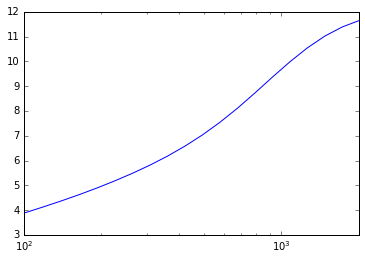

In [50]:
bin_size=len(l)*len(theta)

res2=np.zeros(len(L))
Lmax=L[10:-1:5]
result=[]
for LL in Lmax:
    print(LL)
    ii=0
    for L_ in L[L<=LL]:
        jj=0
        res1 = np.zeros(len(l))
        bi_ = bi_phi[ii*bin_size:(ii+1)*bin_size]
        for l_ in l:
            bi = bi_[jj*len(theta):(jj+1)*len(theta)]
            ll = l_**2+L_**2-2.*L_*l_*np.cos(phi)
            N = nkk(L_)*nkk(np.sqrt(ll))*ngg(L_)*2
            res1[jj] = simps(bi**2/N,phi)
            jj+=1
        res2[ii] = simps(res1*l,l)
        ii+=1
    result+=[simps(res2*L,L)]

plt.figure()
plt.semilogx(Lmax,np.sqrt(np.asarray(result)*0.4/(2*np.pi**2)))
plt.xlim(100,2000)

In [42]:
L,l,theta = pickle.load(open(ellpath+'ell_ang_full_Lmin1_Lmax8000_lmin1_lmax8000_lenL160_lenl160_lenang160_1e-04.pkl','r'))
loadfile = 'bispec_kkk_SN_full_Planck2015_Lmin1-Lmax8000-lmax8000_halofit_SC_post_born_sum'
#theta,L,l,bi_spec = pickle.load(open(specpath+'/interp/bispec_interp_kkg_new_LSSTbin%s_full_Planck2015_Lmin1-Lmax2999-lmax8000_halofit_SC_post_born_sum.pkl'%str(Nbin),'r'))
bi_phi=np.load(specpath+'/bispectra/'+loadfile+'.npy')
phi= theta#np.linspace(0,2.*np.pi,200)[2:-2]

53.1052631579
79.1578947368
103.179519226
120.659355009
141.100482542
165.004579812
192.958315013
225.6477449
263.875152387
308.578736642
360.855638911
421.988869198
493.478794635
577.079962363
674.844160643
789.170775033
922.865675497
1079.21007969
1262.04108249
1475.84582823
1725.87163677
2018.25478626
2360.17111324
2760.01212617
3227.59095468
3774.3831891
4413.80852104
5161.56009719
6035.98966967
7058.55799532


(100, 2000)

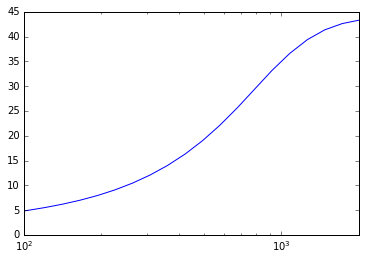

In [45]:
bin_size=len(l)*len(theta)

res2=np.zeros(len(L))
Lmax=L[10:-1:5]
result=[]
for LL in Lmax:
    print(LL)
    ii=0
    for L_ in L[L<=LL]:
        jj=0
        res1 = np.zeros(len(l))
        bi_ = bi_phi[ii*bin_size:(ii+1)*bin_size]
        for l_ in l:
            bi = bi_[jj*len(theta):(jj+1)*len(theta)]
            ll = l_**2+L_**2-2.*L_*l_*np.cos(phi)
            N = nkk(L_)*nkk(np.sqrt(ll))*nkk(L_)*6
            res1[jj] = simps(bi**2/N,phi)
            jj+=1
        res2[ii] = simps(res1*l,l)
        ii+=1
    result+=[simps(res2*L,L)]

plt.figure()
plt.semilogx(Lmax,np.sqrt(np.asarray(result)*0.4/(2*np.pi**2)))
plt.xlim(100,2000)

(100, 2000)

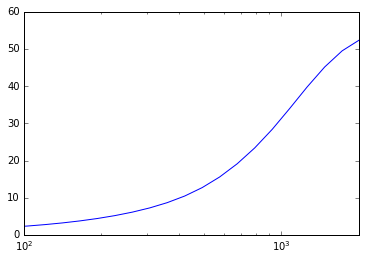